# 4.10 Final submission

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

pd.options.display.float_format = '{:.2f}'.format

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
print(color.BLUE + color.BOLD + 'Read orders_products_customer_filtered.pkl file' + color.END)

def printc(value):
    print(color.CYAN + color.BOLD + '', value , '' + color.END)

Read orders_products_customer_filtered.pkl file


In [2]:
path = r'C:\\Users\\mutta\\Documents\\Project 4\\' 
ords_prods_customer_pkl = os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_filtered.pkl')

df_ords_prods_custs  = pd.read_pickle(ords_prods_customer_pkl)
df_ords_prods_custs.head(10)

print(color.BLUE + 'orders_products_customer_filtered.pkl file loaded successfully' + color.END)

orders_products_customer_filtered.pkl file loaded successfully


#### Instacart has a lot of products with different price tags. Marketing and sales want to use


Pie Chart: Distribution of product sale price on user spending 
----------------------------------------------------
Low spender     31800381
High spender      634678
Name: spending_flag, dtype: int64


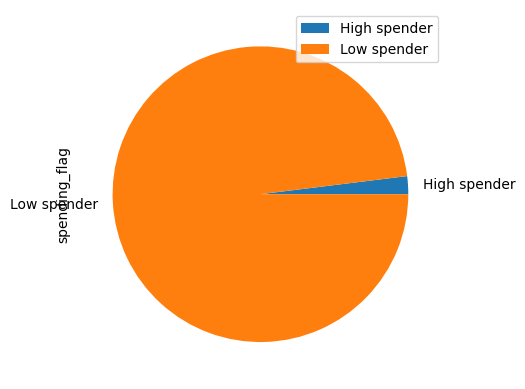

In [3]:
print('Pie Chart: Distribution of product sale price on user spending ')

print('----------------------------------------------------')

print(df_ords_prods_custs['spending_flag'].value_counts())

pie = df_ords_prods_custs['spending_flag'].value_counts().sort_index().plot.pie(rot=0)

pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_spending_flag.png'))

pie.legend(loc=1)  

#### What’s the distribution among users in regards to their brand loyality (i.e., how often do they return to Instacart)?


Pie Chart: Distribution among users in regards to their brand loyalty 
----------------------------------------------------
Frequent customer        22816041
Regular customer          6929012
Non-frequent customer     2690006
Name: frequency_flag, dtype: int64


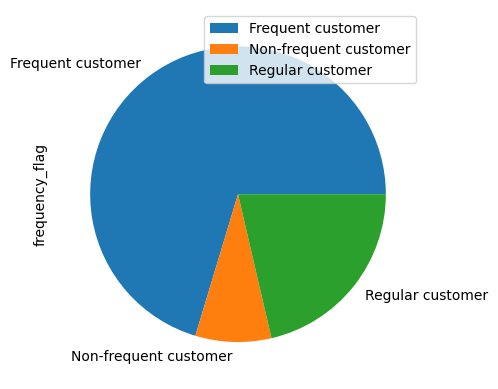

In [4]:
print('Pie Chart: Distribution among users in regards to their brand loyality ')

print('----------------------------------------------------')

print(df_ords_prods_custs['frequency_flag'].value_counts())

pie = df_ords_prods_custs['frequency_flag'].value_counts().sort_index().plot.pie(rot=0)

pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_frequency_flag.png'))

pie.legend(loc=1)  

## Problem 3

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

### Customer behavior in different geographic areas in each regions 

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [5]:
most_orders_threeshold = 2500000
fewest_orders_threeshold = 100000

#devisions
Northeast = []
Midwest = []
South = []
West = []

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

South = ['Delaware', 'Maryland','District of Columbia','Virginia','West Virginia', 'North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee',
         'Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

West = ['Idaho', 'Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']


df_ords_prods_custs.loc[df_ords_prods_custs['state'].isin(Northeast), 'region'] = 'Northeast'
df_ords_prods_custs.loc[df_ords_prods_custs['state'].isin(Midwest), 'region'] = 'Midwest'
df_ords_prods_custs.loc[df_ords_prods_custs['state'].isin(South), 'region'] = 'South'
df_ords_prods_custs.loc[df_ords_prods_custs['state'].isin(West), 'region'] = 'West'



print(df_ords_prods_custs['region'].value_counts(dropna=False))



South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
Name: region, dtype: int64


Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

region     spending_flag
Midwest    High spender       156084
           Low spender       7447932
Northeast  High spender       108276
           Low spender       5620168
South      High spender       209878
           Low spender      10592104
West       High spender       160440
           Low spender       8140177
Name: spending_flag, dtype: int64


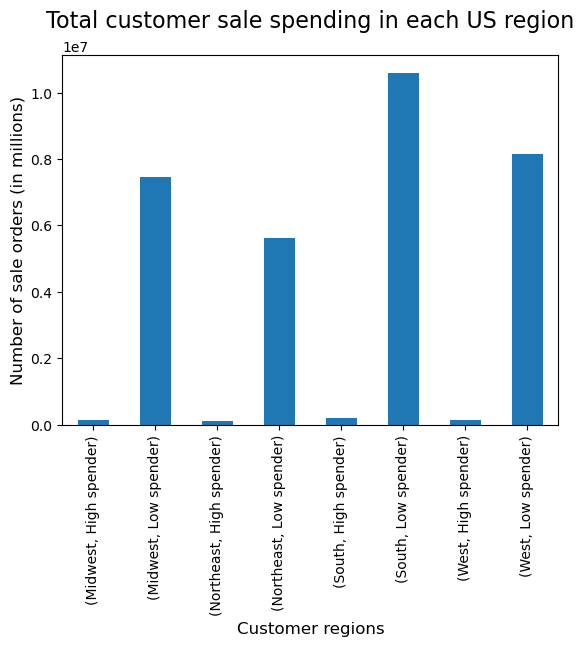

In [6]:
bar_region_spending_flag = df_ords_prods_custs.groupby(['region'])['spending_flag'].value_counts().sort_index().plot.bar()

print(df_ords_prods_custs.groupby(['region'])['spending_flag'].value_counts().sort_index() )

plt.title('Total customer sale spending in each US region', fontsize = 16, pad=20)
plt.ylabel('Number of sale orders (in millions)', fontsize = 12)
plt.xlabel('Customer regions',  fontsize = 12)

bar_region_spending_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spending_flag.png'))

                 region
                 count
department_id         
1.0            2234743
10.0             34573
11.0            447572
12.0            708927
13.0           1875369
14.0            703033
15.0           1068058
16.0           5398747
17.0            738666
18.0            423802
19.0           2887550
2.0              36291
20.0           1051249
21.0             69145
3.0            1172428
4.0            9479291
5.0             153696
6.0             269253
7.0            2688123
8.0              97716
9.0             866627
nan              30200 


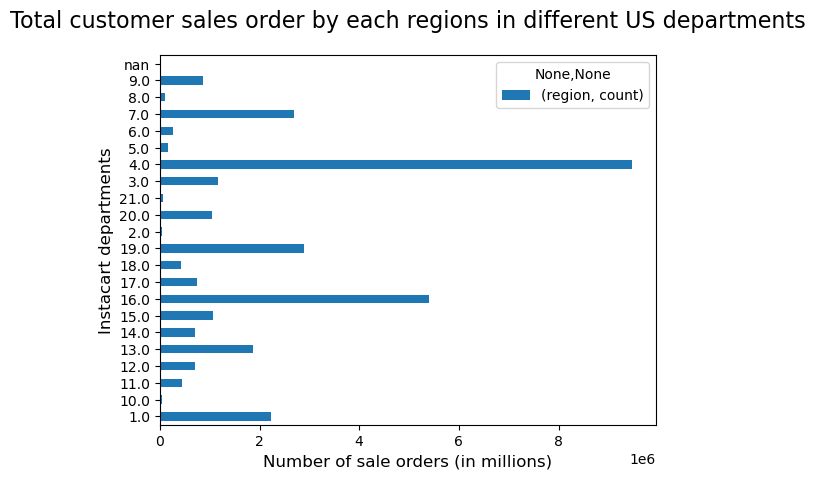

In [7]:
group_value = df_ords_prods_custs.groupby('department_id').agg( { 'region': ['count']})
printc(group_value)
barh_department_id_region = group_value.plot(kind = 'barh', rot = 0)

plt.title('Total customer sales order by each regions in different US departments', fontsize = 16, pad=20)
plt.xlabel('Number of sale orders (in millions)', fontsize = 12)
plt.ylabel('Instacart departments',  fontsize = 12)

barh_department_id_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_department_id_region.png'))

## Problem 3

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [8]:
df_ords_prods_custs['max_product_orders'] = df_ords_prods_custs.groupby(['user_id'])['order_id'].transform('count')

print(df_ords_prods_custs['max_product_orders'].lt(5).value_counts())

df_ords_prods_custs.drop(df_ords_prods_custs[ df_ords_prods_custs['max_product_orders'] < 5 ].index, inplace = True )

print('After removing users whose total orders are less than 5')
print(df_ords_prods_custs['max_product_orders'].lt(5).value_counts())

False    32432184
True         2875
Name: max_product_orders, dtype: int64
After removing users whose total orders are less than 5
False    32432184
Name: max_product_orders, dtype: int64


In [9]:
print('\n\nNumber of rows in data set:', df_ords_prods_custs.shape[0])

print('Number of columns in data set:', df_ords_prods_custs.shape[1])



Number of rows in data set: 32432184
Number of columns in data set: 30


In [10]:
print('Saving the dataframe after removing customer whose orders are less than 5')

df_ords_prods_custs.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customer_filtered_orders.pkl'))

print('Data exported successfully')

Saving the dataframe after removing customer whose orders are less than 5
Data exported successfully


## Problem 5

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. 

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

#### Create profile on age group  

0-14 years (children)

15-24 years (early working age)

25-54 years (prime working age)

55-64 years (mature working age)

65 years and over (elderly)


In [11]:
bins = [0,24,54,64,150]
group_ages=['Early working age','prime working age','mature working age','elderly']
df_ords_prods_custs['profile_age']=pd.cut(df_ords_prods_custs['age'], bins, labels=group_ages)
print('-------------------------------------------------------------------')

printc(df_ords_prods_custs['profile_age'].value_counts())

print('-------------------------------------------------------------------')


-------------------------------------------------------------------
 prime working age     15240939
elderly                8582047
mature working age     5033124
Early working age      3576074
Name: profile_age, dtype: int64 
-------------------------------------------------------------------


In [12]:
#Validate grouping
df_ords_prods_custs.groupby('profile_age').agg({'age': ['min', 'max']})

age    
                   min max
profile_age               
Early working age   18  24
prime working age   25  54
mature working age  55  64
elderly             65  81

#### Create customer profile on income 

    Income less than 200k classified as Low
    Income between 200K and 400K are classified as Mid	
    Income higher than 400 K are classified as High

In [13]:
bins = [0,200000,400000,700000]
group_income=['Low','Mid','High']
df_ords_prods_custs['profile_income']=pd.cut(df_ords_prods_custs['income'],bins,labels=group_income)

df_ords_prods_custs['profile_income'].value_counts()

Low     32173541
Mid       210948
High       47695
Name: profile_income, dtype: int64

In [14]:
#Validate grouping
df_ords_prods_custs.groupby('profile_income').agg({'income': ['min', 'max']})

income        
                   min     max
profile_income                
Low              25903  199927
Mid             200194  398957
High            400278  593901

### Plot visualisations on newly created customer profile and find the relation

        Create lables and title
        
        Plot Visualisation
        
        Save the image

-------------------------------------------------------------------
 busy_days_of_the_week  Busiest days  Regular days  slowest days
profile_age                                                    
Early working age           1311783       1426841        837450
prime working age           5591764       6058857       3590318
mature working age          1842218       2010762       1180144
elderly                     3129035       3430247       2022765 
-------------------------------------------------------------------


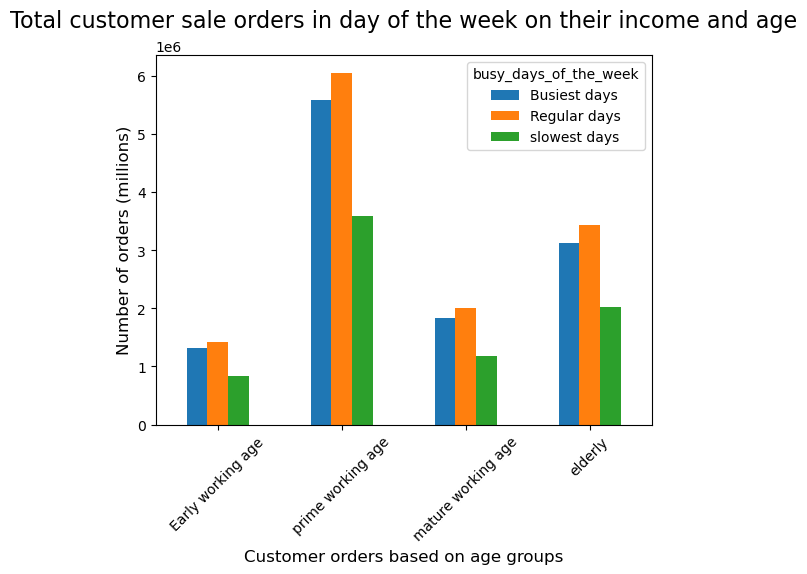

In [15]:


ct_profile_busy_dow = pd.crosstab(df_ords_prods_custs['profile_age'], 
                                  df_ords_prods_custs['busy_days_of_the_week'], dropna = False)
print('-------------------------------------------------------------------')

printc(ct_profile_busy_dow)
print('-------------------------------------------------------------------')

bar_ct_profile_busy_dow = ct_profile_busy_dow.plot(kind = 'bar', rot = 45)

plt.title('Total customer sale orders in day of the week on their income and age', fontsize = 16, pad=20)
plt.ylabel('Number of orders (millions)', fontsize = 12)
plt.xlabel('Customer orders based on age groups',  fontsize = 12)

bar_ct_profile_busy_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ct_profile_busy_dow.png'))



-------------------------------------------------------------------
 loyalty_flag        Loyal customer  New customer  Regular customer
profile_age                                                       
Early working age          1144758        685163           1746153
prime working age          4814944       2923756           7502239
mature working age         1608047        980803           2444274
elderly                    2726278       1656928           4198841 
-------------------------------------------------------------------


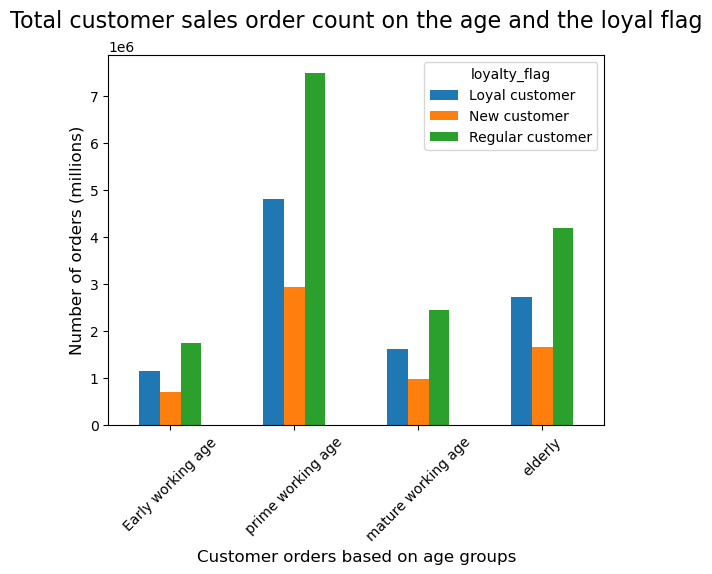

In [16]:

ct_profile_age_loyalty_flag = pd.crosstab(df_ords_prods_custs['profile_age'], 
                                  df_ords_prods_custs['loyalty_flag'], dropna = False)
print('-------------------------------------------------------------------')

printc(ct_profile_age_loyalty_flag)
print('-------------------------------------------------------------------')

bar_ct_profile_age_loyalty_flag = ct_profile_age_loyalty_flag.plot(kind = 'bar', rot = 45)

plt.title('Total customer sales order count on the age and the loyal flag', fontsize = 16, pad=20)
plt.ylabel('Number of orders (millions)', fontsize = 12)
plt.xlabel('Customer orders based on age groups',  fontsize = 12)


bar_ct_profile_age_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ct_profile_age_loyalty_flag.png'))



-------------------------------------------------------------------
 no_of_dependents          0        1        2        3
profile_age                                           
Early working age    864248   922864   878745   910217
prime working age   3808522  3806537  3802397  3823483
mature working age  1309840  1232945  1227972  1262367
elderly             2121982  2125436  2188849  2145780 
-------------------------------------------------------------------


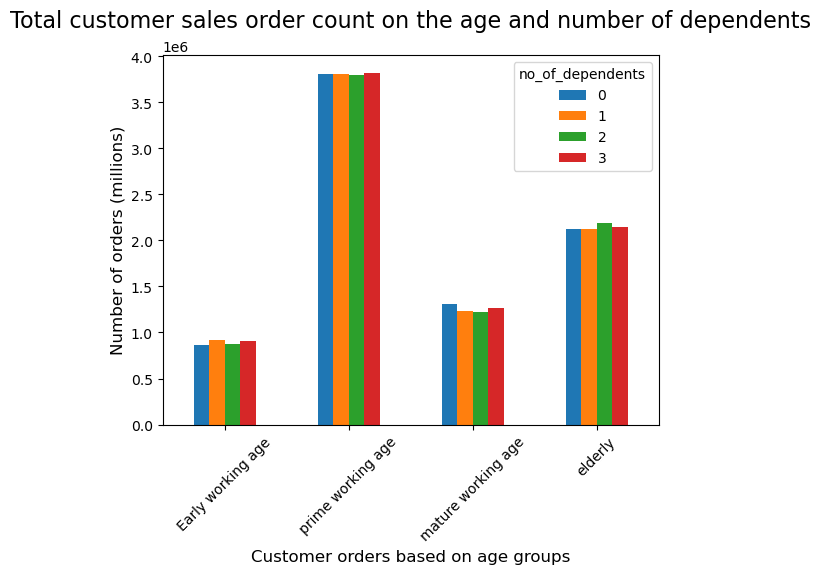

In [17]:

ct_profile_no_of_dependents = pd.crosstab(df_ords_prods_custs['profile_age'], 
                                  df_ords_prods_custs['no_of_dependents'], dropna = False)
print('-------------------------------------------------------------------')

printc(ct_profile_no_of_dependents)

print('-------------------------------------------------------------------')

bar_ct_profile_no_of_dependents = ct_profile_no_of_dependents.plot(kind = 'bar', rot = 45)

plt.title('Total customer sales order count on the age and number of dependents', fontsize = 16, pad=20)
plt.ylabel('Number of orders (millions)', fontsize = 12)
plt.xlabel('Customer orders based on age groups',  fontsize = 12)


bar_ct_profile_no_of_dependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ct_profile_no_of_dependents.png'))



Department 4(Bakery) items orders are most in all age groups
-------------------------------------------------------------------
 department_id           1.0   10.0    11.0    12.0    13.0    14.0    15.0  \
profile_age                                                                  
Early working age    246346   3872   49002   78918  206904   78931  117849   
prime working age   1046858  16235  210962  329956  879549  330861  502876   
mature working age   347708   5222   70151  109899  291825  109362  164855   
elderly              593628   9241  117382  190106  496940  183830  282433   

department_id          16.0    17.0    18.0  ...    20.0   21.0     3.0  \
profile_age                                  ...                          
Early working age    596977   81193   47389  ...  115144   7989  129302   
prime working age   2542863  345972  202509  ...  493537  32728  551540   
mature working age   832435  114443   64453  ...  164907  10333  182011   
elderly             142611

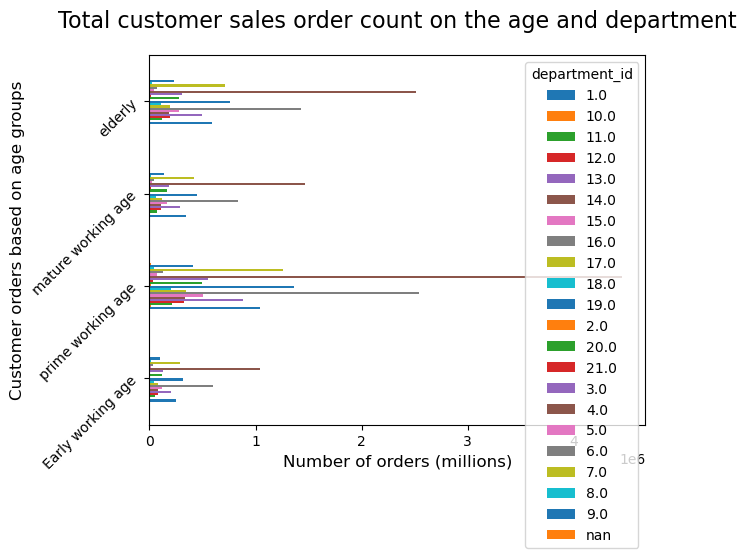

In [18]:

ct_profile_department_id = pd.crosstab(df_ords_prods_custs['profile_age'], 
                                  df_ords_prods_custs['department_id'], dropna = False)


print('Department 4(Bakery) items orders are most in all age groups')
print('-------------------------------------------------------------------')
printc(ct_profile_department_id)
print('-------------------------------------------------------------------')
bar_ct_profile_department_id = ct_profile_department_id.plot(kind = 'barh', rot = 45)

plt.title('Total customer sales order count on the age and department', fontsize = 16, pad=20)
plt.ylabel('Customer orders based on age groups', fontsize = 12)
plt.xlabel('Number of orders (millions)',  fontsize = 12)

bar_ct_profile_department_id.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ct_profile_department_id.png'))





-------------------------------------------------------------------
 region              Midwest  Northeast    South     West
profile_age                                             
Early working age    828295     631097  1219285   897397
prime working age   3600903    2674998  5058663  3906375
mature working age  1182030     866600  1684369  1300125
elderly             1992220    1555280  2838579  2195968 
-------------------------------------------------------------------


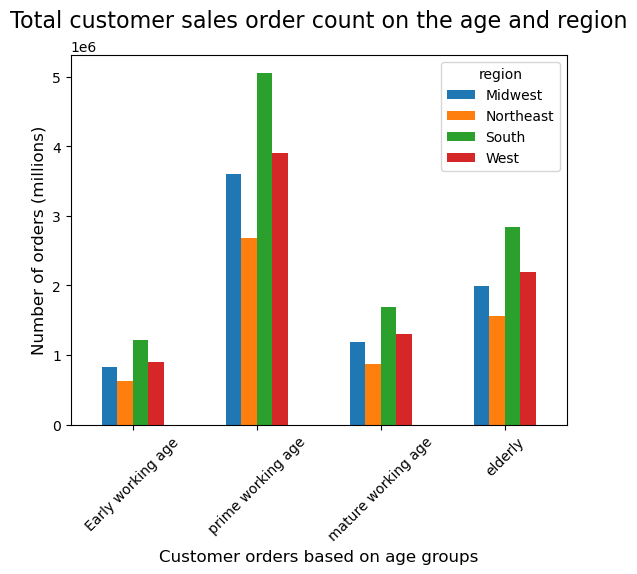

In [19]:

ct_profile_age_region = pd.crosstab(df_ords_prods_custs['profile_age'], 
                                  df_ords_prods_custs['region'], dropna = False)

print('-------------------------------------------------------------------')
printc(ct_profile_age_region)
print('-------------------------------------------------------------------')

bar_ct_profile_age_region = ct_profile_age_region.plot(kind = 'bar', rot = 45)

plt.title('Total customer sales order count on the age and region', fontsize = 16, pad=20)
plt.ylabel('Number of orders (millions)', fontsize = 12)
plt.xlabel('Customer orders based on age groups',  fontsize = 12)

bar_ct_profile_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ct_profile_age_region.png'))




-------------------------------------------------------------------
 spending_flag   High spender  Low spender
profile_income                           
Low                   375507     31798034
Mid                   210948            0
High                   47695            0 
-------------------------------------------------------------------


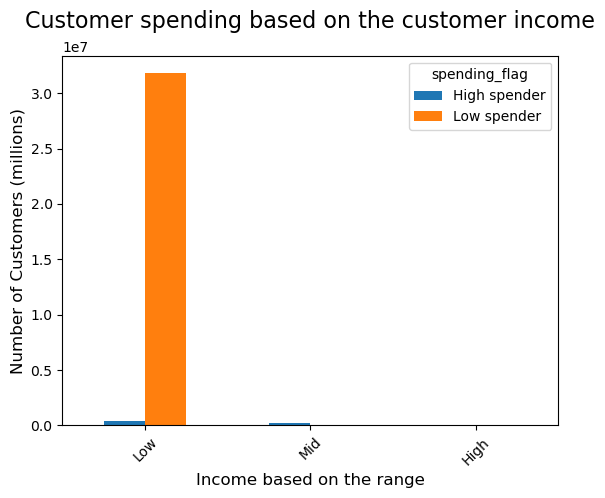

In [20]:

ct_spending_flag_spending_flag = pd.crosstab(df_ords_prods_custs['profile_income'], df_ords_prods_custs['spending_flag'], dropna = False)

print('-------------------------------------------------------------------')
printc(ct_spending_flag_spending_flag)
print('-------------------------------------------------------------------')
bar_ct_spending_flag_spending_flag = ct_spending_flag_spending_flag.plot(kind = 'bar', rot = 45)

plt.title('Customer spending based on the customer income', fontsize = 16, pad=20)
plt.ylabel('Number of Customers (millions)', fontsize = 12)
plt.xlabel('Income based on the range',  fontsize = 12)


bar_ct_spending_flag_spending_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ct_spending_flag_spending_flag.png'))



-------------------------------------------------------------------
 region          Midwest  Northeast     South     West
profile_income                                       
Low             7538124    5686829  10715943  8232645
Mid               48717      34288     72558    55385
High              16607       6858     12395    11835 
-------------------------------------------------------------------


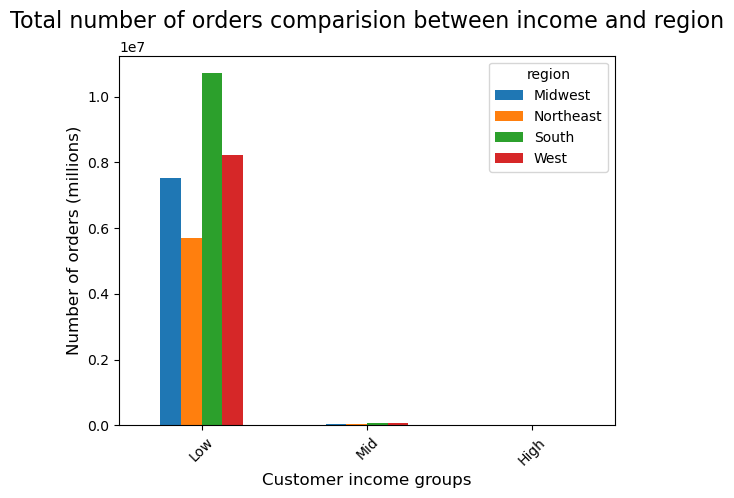

In [21]:


ct_profile_income_region = pd.crosstab(df_ords_prods_custs['profile_income'], 
                                  df_ords_prods_custs['region'], dropna = False)
print('-------------------------------------------------------------------')
printc(ct_profile_income_region)
print('-------------------------------------------------------------------')
bar_ct_profile_income_region = ct_profile_income_region.plot(kind = 'bar', rot = 45)

plt.title('Total number of orders comparision between income and region', fontsize = 16, pad=20)
plt.ylabel('Number of orders (millions)', fontsize = 12)
plt.xlabel('Customer income groups',  fontsize = 12)

bar_ct_profile_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ct_profile_income_region.png'))



-------------------------------------------------------------------
 marital_status  divorced/widowed  living with parents and siblings   married  \
profile_income                                                                 
Low                      2749433                           1547910  22586664   
Mid                        19234                              4175    153632   
High                        5544                                 0     35211   

marital_status   single  
profile_income           
Low             5289534  
Mid               33907  
High               6940   
-------------------------------------------------------------------


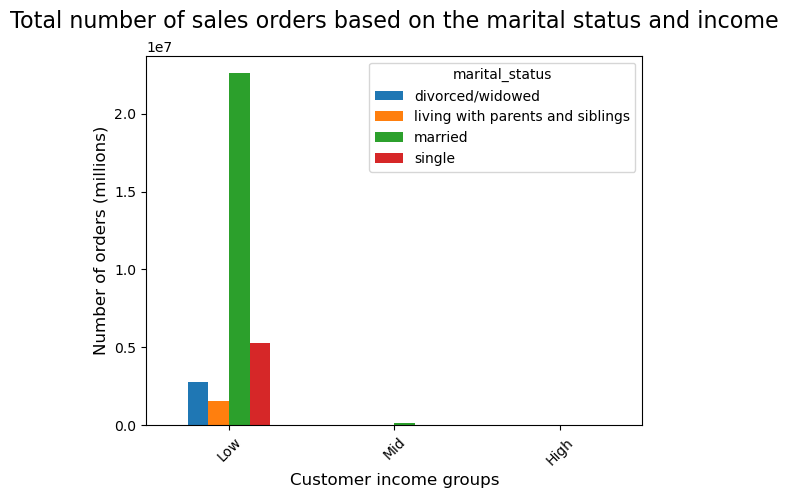

In [22]:


ct_profile_income_marital_status = pd.crosstab(df_ords_prods_custs['profile_income'], 
                                  df_ords_prods_custs['marital_status'], dropna = False)
print('-------------------------------------------------------------------')
printc(ct_profile_income_marital_status)
print('-------------------------------------------------------------------')
bar_ct_profile_income_marital_status = ct_profile_income_marital_status.plot(kind = 'bar', rot = 45)

plt.title('Total number of sales orders based on the marital status and income', fontsize = 16, pad=20)
plt.ylabel('Number of orders (millions)', fontsize = 12)
plt.xlabel('Customer income groups',  fontsize = 12)

bar_ct_profile_income_marital_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ct_profile_income_marital_status.png'))


-------------------------------------------------------------------
 profile_income         Low    Mid  High
order_hour_of_day                      
0                   217618   1155   151
1                   114873    723   173
2                    68482    845    95
3                    50794    449    75
4                    52567    559   150
5                    86935    913   204
6                   287737   2552   479
7                   883844   6332  1716
8                  1705918  11514  2402
9                  2436512  16691  3333
10                 2742247  18764  3175
11                 2715991  18351  4046
12                 2599694  16426  4516
13                 2642344  16858  3936
14                 2670793  16930  3619
15                 2641657  18277  4423
16                 2516757  16577  3982
17                 2072298  13520  3530
18                 1624187  11026  2619
19                 1249709   8035  1590
20                  969509   6048  1397
21         

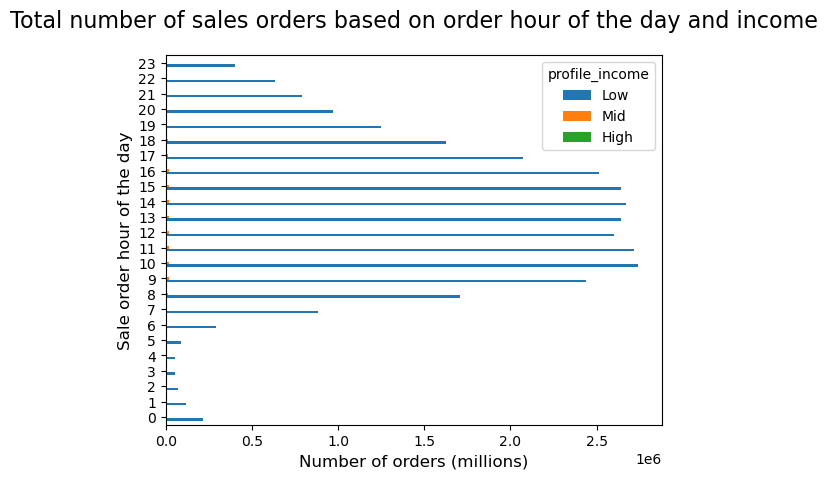

In [23]:



ct_profile_income_order_HOD = pd.crosstab(df_ords_prods_custs['order_hour_of_day'], 
                                  df_ords_prods_custs['profile_income'], dropna = False)
print('-------------------------------------------------------------------')
printc(ct_profile_income_order_HOD)
print('-------------------------------------------------------------------')
bar_ct_profile_income_order_HOD = ct_profile_income_order_HOD.plot(kind = 'barh', rot = 0)

plt.title('Total number of sales orders based on order hour of the day and income', fontsize = 16, pad=20)

plt.xlabel('Number of orders (millions)',  fontsize = 12)
plt.ylabel('Sale order hour of the day', fontsize = 12)

bar_ct_profile_income_order_HOD.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ct_profile_income_order_HOD.png'))


-------------------------------------------------------------------
 profile_income          Low    Mid  High
orders_day_of_week                      
0                   6167595  33554  8237
1                   5618974  38066  8374
2                   4182966  27951  6564
3                   3811360  25535  6872
4                   3753466  28066  5378
5                   4171992  30529  6676
6                   4467188  27247  5594 
-------------------------------------------------------------------


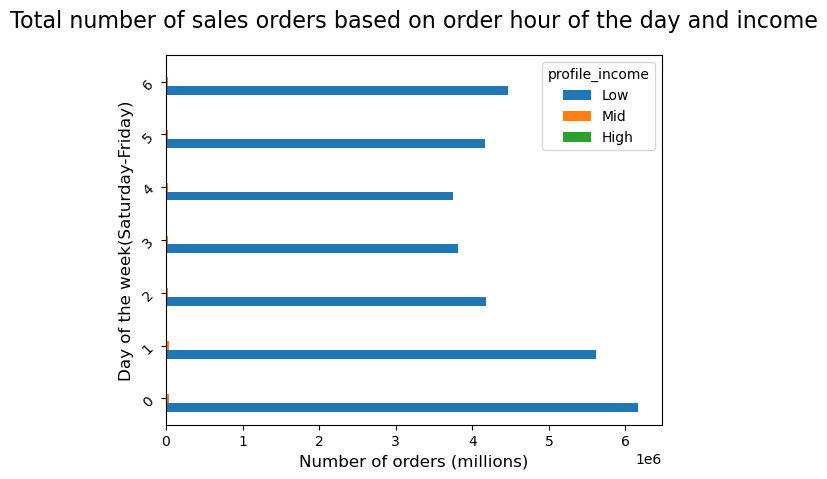

In [24]:


ct_profile_income_order_DOW = pd.crosstab(df_ords_prods_custs['orders_day_of_week'], 
                                  df_ords_prods_custs['profile_income'], dropna = False)
print('-------------------------------------------------------------------')
printc(ct_profile_income_order_DOW)
print('-------------------------------------------------------------------')
bar_ct_profile_income_order_DOW = ct_profile_income_order_DOW.plot(kind = 'barh', rot = 45)

plt.title('Total number of sales orders based on order hour of the day and income', fontsize = 16, pad=20)
plt.ylabel('Day of the week(Saturday-Friday)', fontsize = 12)
plt.xlabel('Number of orders (millions)',  fontsize = 12)

bar_ct_profile_income_order_DOW.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ct_profile_income_order_DOW.png'))



-------------------------------------------------------------------
 price_label         High-range product  Low-range product  Mid-range product
profile_age                                                                 
Early working age                46326            1115693            2410647
prime working age               194830            4758319           10273672
mature working age               64551            1573384            3390240
elderly                         111943            2677893            5784487 
-------------------------------------------------------------------


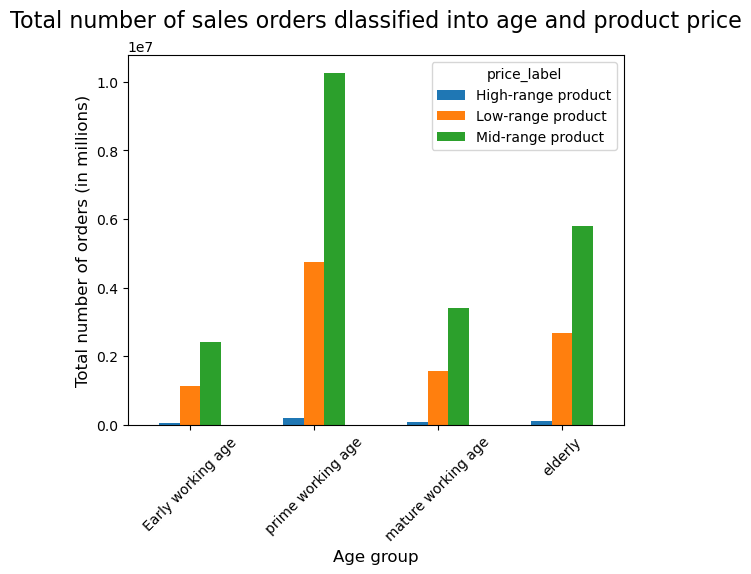

In [25]:

ct_profile_income_price_label = pd.crosstab(df_ords_prods_custs['profile_age'], 
                                  df_ords_prods_custs['price_label'], dropna = False)
print('-------------------------------------------------------------------')
printc(ct_profile_income_price_label)
print('-------------------------------------------------------------------')
bar_ct_profile_income_price_label = ct_profile_income_price_label.plot(kind = 'bar', rot = 45)

plt.title('Total number of sales orders dlassified into age and product price', fontsize = 16, pad=20)
plt.ylabel('Total number of orders (in millions)', fontsize = 12)
plt.xlabel('Age group',  fontsize = 12)


bar_ct_profile_income_price_label.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ct_profile_income_price_label.png'))


## Problem 7

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [26]:
print(color.BLUE + 'Aggregated mean of the numeric columns grouped by “profile_age”' + color.END)

print('----------------------------------------------------------------------------------------------')

group_value = df_ords_prods_custs.groupby('profile_age').agg({'reordered': ['mean', 'min', 'max'],
                                                                'prices': ['mean', 'min', 'max'],
                                                                'orders_day_of_week': ['mean', 'min', 'max'],
                                                                'order_hour_of_day': ['mean', 'min', 'max'],
                                                                'days_since_prior_order': ['mean', 'min', 'max']
                                                                })
group_value

Aggregated mean of the numeric columns grouped by “profile_age”
----------------------------------------------------------------------------------------------


reordered         prices            orders_day_of_week      \
                        mean min max   mean  min   max               mean min   
profile_age                                                                     
Early working age       0.59   0   1   7.79 1.00 25.00               2.74   0   
prime working age       0.59   0   1   7.79 1.00 25.00               2.73   0   
mature working age      0.59   0   1   7.79 1.00 25.00               2.74   0   
elderly                 0.59   0   1   7.80 1.00 25.00               2.75   0   

                       order_hour_of_day         days_since_prior_order       \
                   max              mean min max                   mean  min   
profile_age                                                                    
Early working age    6             13.40   0  23                  10.35 0.00   
prime working age    6             13.43   0  23                  10.40 0.00   
mature working age   6             13.43   0  23                  10.43 0.00   
elderly              6             13.43   0  23                  10.37 0.00   

                          
                     max  
profile_age               
Early working age  30.00  
prime working age  30.00  
mature working age 30.00  
elderly            30.00

In [27]:
print(color.BLUE + 'Aggregated mean of the numeric columns grouped by “profile_income”' + color.END)
print('-----------------------------------------------------------------------------------------------')

group_value = df_ords_prods_custs.groupby('profile_income').agg({'reordered': ['mean', 'min', 'max'],
                                                                'prices': ['mean', 'min', 'max'],
                                                                'orders_day_of_week': ['mean', 'min', 'max'],
                                                                'order_hour_of_day': ['mean', 'min', 'max'],
                                                                'days_since_prior_order': ['mean', 'min', 'max']
                                                                })
group_value

Aggregated mean of the numeric columns grouped by “profile_income”
-----------------------------------------------------------------------------------------------


reordered         prices            orders_day_of_week          \
                    mean min max   mean  min   max               mean min max   
profile_income                                                                  
Low                 0.59   0   1   7.79 1.00 25.00               2.74   0   6   
Mid                 0.59   0   1   7.79 1.00 25.00               2.84   0   6   
High                0.58   0   1   7.74 1.00 25.00               2.74   0   6   

               order_hour_of_day         days_since_prior_order             
                            mean min max                   mean  min   max  
profile_income                                                              
Low                        13.43   0  23                  10.40 0.00 30.00  
Mid                        13.18   0  23                   9.68 0.00 30.00  
High                       13.41   0  23                   9.90 0.00 30.00

## Problem 8

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

-------------------------------------------------------------------
 region              Midwest  Northeast    South     West
profile_age                                             
Early working age    828295     631097  1219285   897397
prime working age   3600903    2674998  5058663  3906375
mature working age  1182030     866600  1684369  1300125
elderly             1992220    1555280  2838579  2195968 
-------------------------------------------------------------------


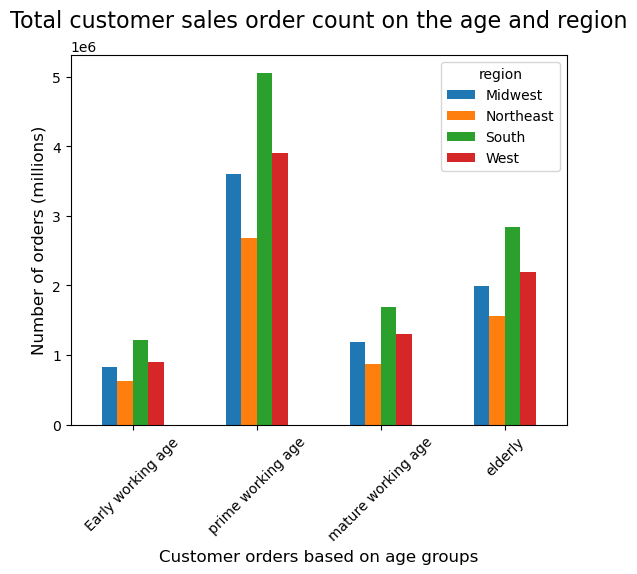

In [28]:
ct_profile_age_region = pd.crosstab(df_ords_prods_custs['profile_age'], 
                                  df_ords_prods_custs['region'], dropna = False)


print('-------------------------------------------------------------------')
printc(ct_profile_age_region)
print('-------------------------------------------------------------------')

bar_ct_profile_age_region = ct_profile_age_region.plot(kind = 'bar', rot = 45)
plt.title('Total customer sales order count on the age and region', fontsize = 16, pad=20)
plt.ylabel('Number of orders (millions)', fontsize = 12)
plt.xlabel('Customer orders based on age groups',  fontsize = 12)


bar_ct_profile_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ct_profile_age_region.png'))



Department 4(Bakery) items orders are most in all age groups
-------------------------------------------------------------------
 profile_age    Early working age  prime working age  mature working age  \
department_id                                                             
1.0                       246346            1046858              347708   
10.0                        3872              16235                5222   
11.0                       49002             210962               70151   
12.0                       78918             329956              109899   
13.0                      206904             879549              291825   
14.0                       78931             330861              109362   
15.0                      117849             502876              164855   
16.0                      596977            2542863              832435   
17.0                       81193             345972              114443   
18.0                       47389             

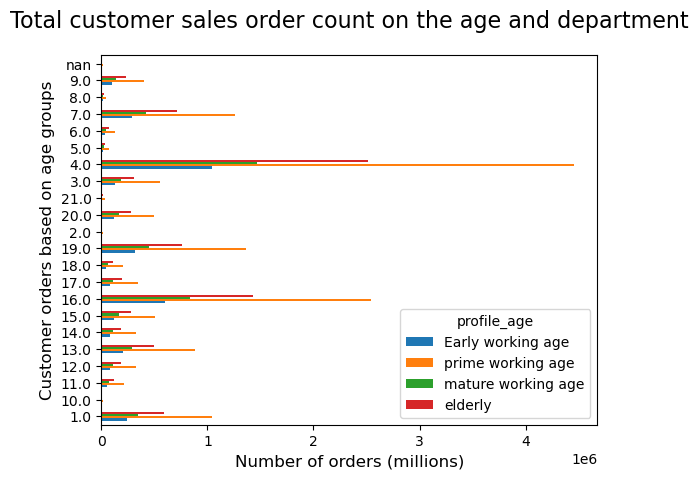

In [29]:

ct_profile_department_id = pd.crosstab(df_ords_prods_custs['department_id'], 
                                  df_ords_prods_custs['profile_age'], dropna = False)


print('Department 4(Bakery) items orders are most in all age groups')
print('-------------------------------------------------------------------')
printc(ct_profile_department_id)
print('-------------------------------------------------------------------')
bar_ct_profile_department_id = ct_profile_department_id.plot(kind = 'barh', rot = 0)
plt.title('Total customer sales order count on the age and department', fontsize = 16, pad=20)
plt.ylabel('Customer orders based on age groups', fontsize = 12)
plt.xlabel('Number of orders (millions)',  fontsize = 12)


bar_ct_profile_department_id.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ct_profile_department_id.png'))



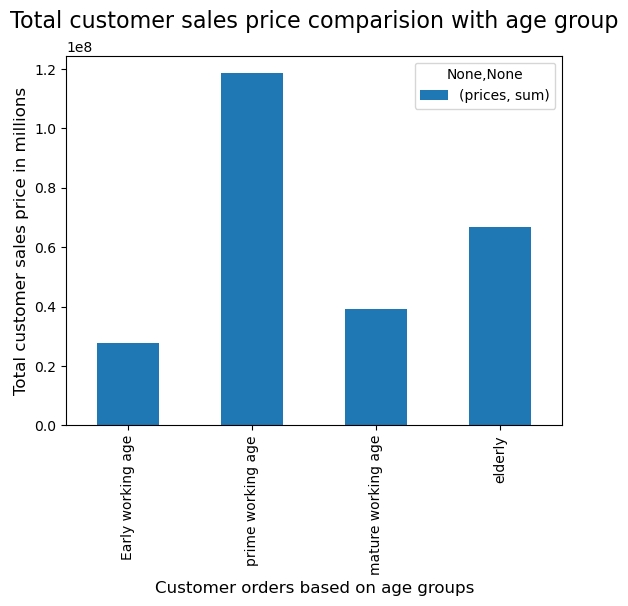

In [30]:


group_value = df_ords_prods_custs.groupby('profile_age').agg( { 'prices': ['sum']})
bar_profile_age_sum_price = group_value.plot(kind = 'bar', rot = 90)

plt.title('Total customer sales price comparision with age group', fontsize = 16, pad=20)
plt.ylabel('Total customer sales price in millions', fontsize = 12)
plt.xlabel('Customer orders based on age groups',  fontsize = 12)


bar_profile_age_sum_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_age_sum_price.png'))



                prices
                  sum
region               
Midwest   59188804.00
Northeast 44526661.20
South     84100078.60
West      64589681.60 


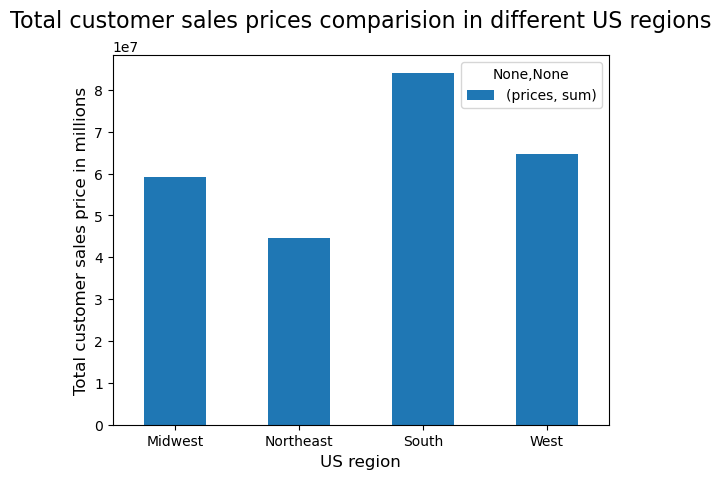

In [31]:



group_value = df_ords_prods_custs.groupby('region').agg( { 'prices': ['sum']})
printc(group_value)
bar_profile_region_sum_price = group_value.plot(kind = 'bar', rot = 0)

plt.title('Total customer sales prices comparision in different US regions', fontsize = 16, pad=20)
plt.ylabel('Total customer sales price in millions', fontsize = 12)
plt.xlabel('US region',  fontsize = 12)

bar_profile_region_sum_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_region_sum_price.png'))


                      user_id
                       count
profile_age                 
Early working age    3576074
prime working age   15240939
mature working age   5033124
elderly              8582047 


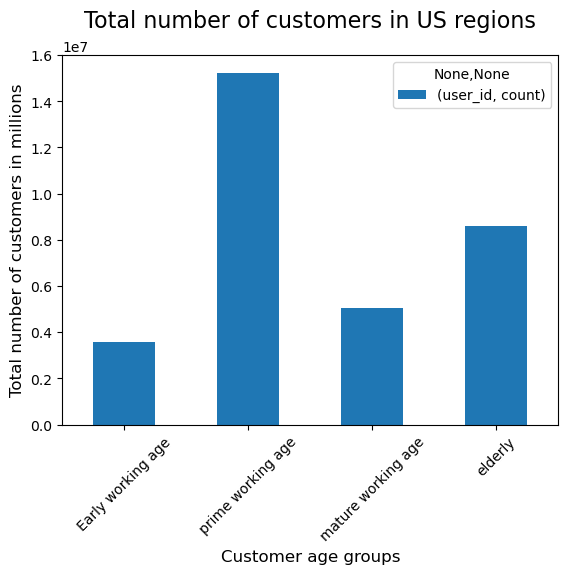

In [33]:


group_value = df_ords_prods_custs.groupby('profile_age').agg( { 'user_id': ['count']})
printc(group_value)
bar_profile_age_count_users = group_value.plot(kind = 'bar', rot = 45)
plt.title('Total number of customers in US regions', fontsize = 16, pad=20)
plt.ylabel('Total number of customers in millions', fontsize = 12)
plt.xlabel('Customer age groups',  fontsize = 12)

bar_profile_age_count_users.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_age_count_users.png'))


                     order_id
                       count
profile_age                 
Early working age    3576074
prime working age   15240939
mature working age   5033124
elderly              8582047 


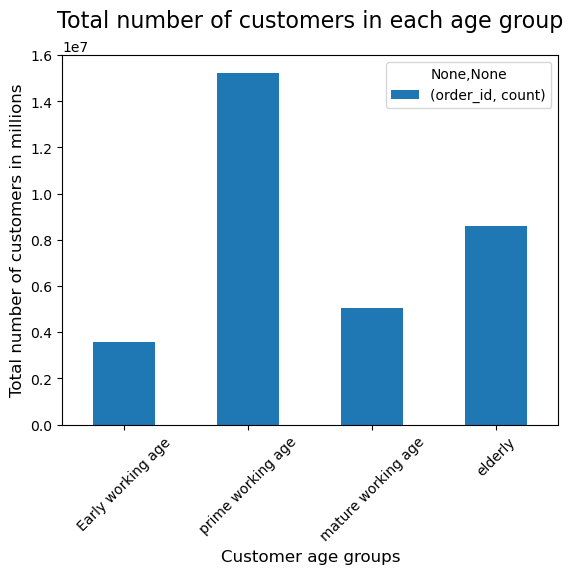

In [34]:



group_value = df_ords_prods_custs.groupby('profile_age').agg( { 'order_id': ['count']})
printc(group_value)
bar_profile_age_count_orders = group_value.plot(kind = 'bar', rot = 45)

plt.title('Total number of customers in each age group', fontsize = 16, pad=20)
plt.ylabel('Total number of customers in millions', fontsize = 12)
plt.xlabel('Customer age groups',  fontsize = 12)

bar_profile_age_count_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_age_count_orders.png'))


 loyalty_flag   Loyal customer  New customer  Regular customer
department_id                                                
1.0                    609460        485080           1140000
10.0                    13834          5268             15468
11.0                   123365         98633            225499
12.0                   202480        146562            359837
13.0                   560402        392089            922727
14.0                   221577        138313            343094
15.0                   294594        236135            537284
16.0                  1830707        971268           2596419
17.0                   196873        166747            374867
18.0                   167108         60107            196576
19.0                   943150        533990           1410149
2.0                     10715          7711             17857
20.0                   324046        205694            521453
21.0                    18350         17087             33705
3.0    

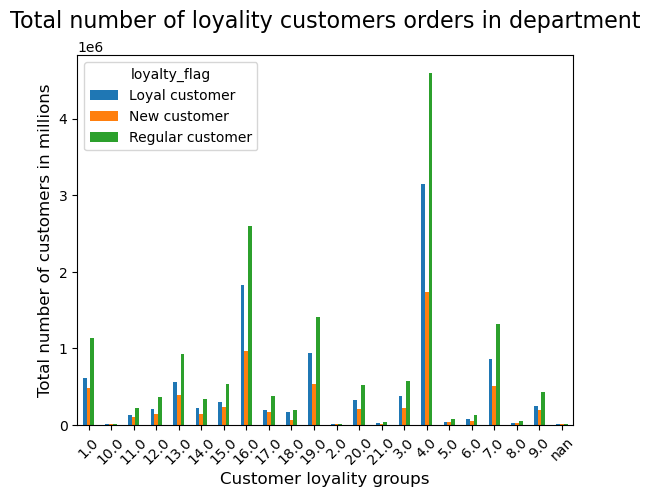

In [40]:

ct_loyalty_flag_count_department = pd.crosstab(df_ords_prods_custs['department_id'], 
                                  df_ords_prods_custs['loyalty_flag'], dropna = False)

printc(ct_loyalty_flag_count_department)
bar_loyalty_flag_count_department = ct_loyalty_flag_count_department.plot(kind = 'bar', rot = 45)

plt.title('Total number of loyality customers orders in department', fontsize = 16, pad=20)
plt.ylabel('Total number of customers in millions', fontsize = 12)
plt.xlabel('Customer loyality groups',  fontsize = 12)

bar_loyalty_flag_count_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag_count_department.png'))


In [35]:

print('Total columns in final export file')
print(df_ords_prods_custs.columns)

print('\n\nNumber of rows in combined order, product, customer data:', df_ords_prods_custs.shape[0])

print('Number of columns in combined order, product, customer data:', df_ords_prods_custs.shape[1])



Total columns in final export file
Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busy_days_of_the_week',
       'busiest_period_of_day', 'loyalty_flag', 'spending_flag',
       'frequency_flag', 'First Name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'no_of_dependents', 'marital_status', 'income', 'region',
       'max_product_orders', 'profile_age', 'profile_income'],
      dtype='object')


Number of rows in combined order, product, customer data: 32432184
Number of columns in combined order, product, customer data: 32


In [36]:
print('Saving the dataframe after removing outliers from the price column..')

df_ords_prods_custs.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_analysis_instacart_dataframe.pkl'))

print('Data exported successfully')

Saving the dataframe after removing outliers from the price column..
Data exported successfully
